In [1]:
# import os
import pandas as pd
import numpy as np
# import regex as re
from collections import defaultdict
# from typing import Tuple, List, NewType
# from tqdm.notebook import tqdm_notebook as tqdm

import matplotlib.pyplot as plt
import seaborn as sns 
# %config InlineBackend.figure_format = 'retina'

import logging



In [2]:
print(plt.style.available)
plt.style.use('fivethirtyeight')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


# Load Epitope Database

In [12]:
Ep_dist_df = pd.read_pickle('EpitopevsHLA.pickle')
Ep_dist_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 0 to 423
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Epitope              424 non-null    object 
 1   ElliPro Score        424 non-null    object 
 2   PolymorphicResidues  424 non-null    object 
 3   AntibodyReactivity   424 non-null    object 
 4   Luminex Alleles      424 non-null    object 
 5   All Alleles          424 non-null    object 
 6   distance [A]         424 non-null    object 
 7   mean_distance [A]    424 non-null    float64
 8   std_distance [A]     424 non-null    float64
 9   mAb                  424 non-null    object 
 10  Location             424 non-null    object 
 11  isotype              424 non-null    object 
dtypes: float64(2), object(10)
memory usage: 43.1+ KB


# Manual Distance Assignment

In [18]:
Ep_dist_df[Ep_dist_df.Epitope=='270C']['Luminex Alleles'].values

array([{'B*73:01', 'C*17:01'}], dtype=object)

In [19]:
Ep_dist_df[Ep_dist_df['mean_distance [A]'].isna()]

,Epitope,ElliPro Score,PolymorphicResidues,AntibodyReactivity,Luminex Alleles,All Alleles,distance [A],mean_distance [A],std_distance [A],mAb,Location,isotype


In [8]:
# The below Epitopes should be further investigated
Ep_dist_df[Ep_dist_df['mean_distance [A]'].isna()]

,Epitope,ElliPro Score,PolymorphicResidues,AntibodyReactivity,Luminex Alleles,All Alleles,distance [A],mean_distance [A],std_distance [A],mAb,Location,isotype


In [20]:
Ep_dist_df[Ep_dist_df.Epitope=='95F']['All Alleles'].values

array([], dtype=object)

/Users/Danial/.local/share/virtualenvs/desa_paper-IhoHddMh/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Danial/.local/share/virtualenvs/desa_paper-IhoHddMh/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Danial/.local/share/virtualenvs/desa_paper-IhoHddMh/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future v

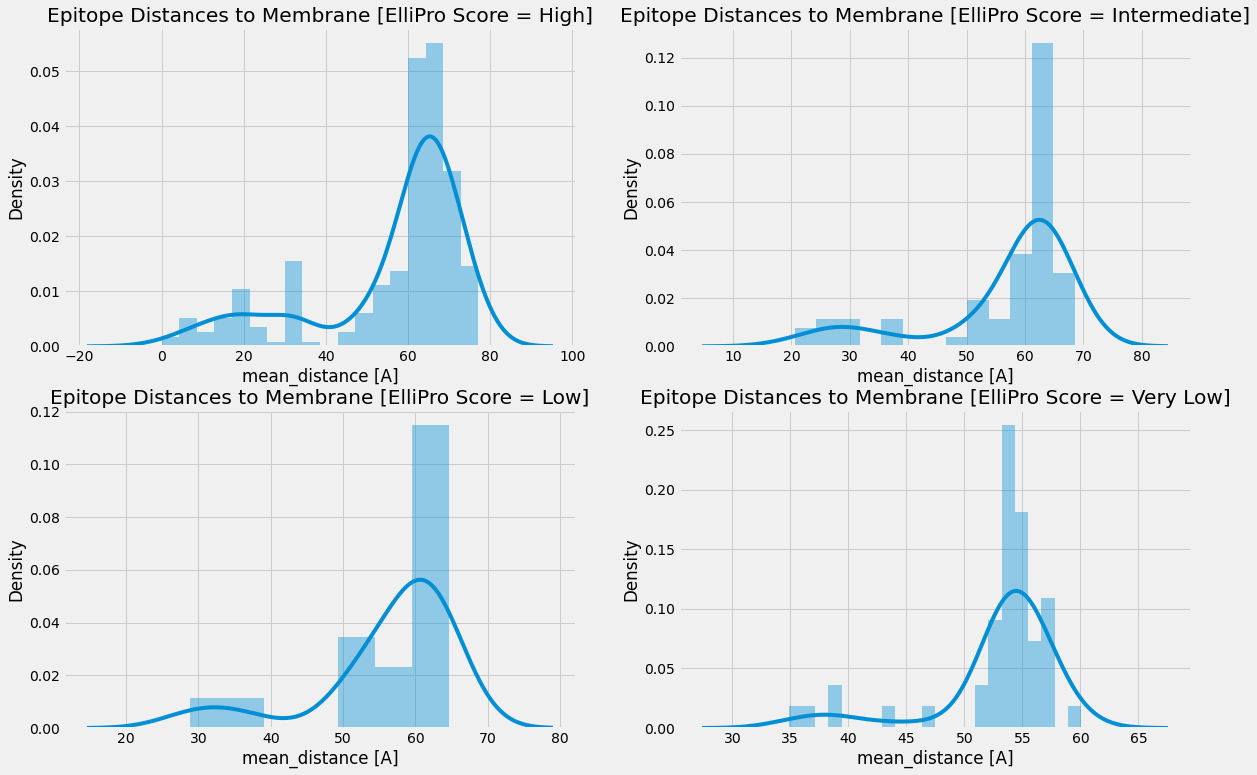

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(18,12))
ind = Ep_dist_df['ElliPro Score'] == 'High'
sns.distplot(Ep_dist_df[ind]['mean_distance [A]'].dropna(), norm_hist=True, ax=ax[0,0]);
ax[0,0].set_title('Epitope Distances to Membrane [ElliPro Score = High]');

ind = Ep_dist_df['ElliPro Score'] == 'Intermediate'
sns.distplot(Ep_dist_df[ind]['mean_distance [A]'].dropna(), norm_hist=True, ax=ax[0,1]);
ax[0,1].set_title('Epitope Distances to Membrane [ElliPro Score = Intermediate]');

ind = Ep_dist_df['ElliPro Score'] == 'Low'
sns.distplot(Ep_dist_df[ind]['mean_distance [A]'].dropna(), norm_hist=True, ax=ax[1,0]);
ax[1,0].set_title('Epitope Distances to Membrane [ElliPro Score = Low]');

ind = Ep_dist_df['ElliPro Score'] == 'Very Low'
sns.distplot(Ep_dist_df[ind]['mean_distance [A]'].dropna(), norm_hist=True, ax=ax[1,1]);
ax[1,1].set_title('Epitope Distances to Membrane [ElliPro Score = Very Low]');
fig.savefig('overview.pdf')

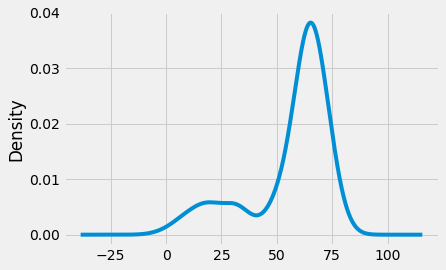

In [23]:
Ep_dist_df[Ep_dist_df['ElliPro Score']=='High']['mean_distance [A]'].plot(kind='kde');